# Chapter 05. 회귀

## 01 회귀 소개

- 회귀 기반 분석은 엔지니어링, 의학, 사회과학, 경제학 등의 분야가 발전하는 데 크게 기여함.
- 회귀 분석은 유전적 특성을 연구하던 영국의 통계학자 갈톤(Galton)이 수행한 연구에서 유래함.
- ex. 사람의 키는 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙이 있음.

- 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭함.
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것

- 회귀 계수가 선형이냐 아니냐 -> 선형 회귀/비선형 회귀
- 독립변수의 개수가 한 개인지 여러 개인지 -> 단일 회귀/다중 회귀
- 지도학습 -> 분류(이산형클래스값) / 회귀(연속형숫자값)

### 대표적인 선형 회귀 모델
- **일반 선형 회귀** : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화. 규제를 적용하지 않은 모델
- **릿지(Rigde)** : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델임.
- **라쏘(Lasso)** : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식.
- **엘라스틱넷(ElasticNet)** : L2, L1 규제를 함꼐 결합한 모델임.
- **로지스틱 회귀(Logistic Regression)** : 로지스틱 회귀는 회귀라는 이름은 붙어 있지만, 사실은 분류에 사용되는 선형 모델임. 매우 강력한 분류 알고리즘

## 02 단순 성형 회귀를 통한 회귀 이해

단순 선형 회귀는 독립변수, 종속변수가 모두 하나인 선형 회귀

예. 주택 가격이 주택의 크기로만 결정됨.
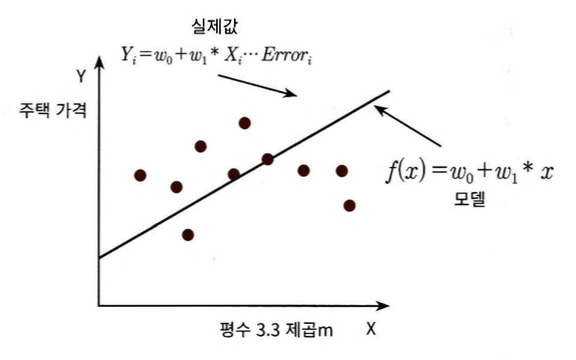

실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, **잔차**라고 부름.

최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미
동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미가 됨.

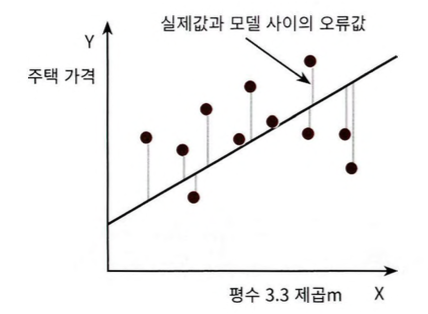

보통 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는(RSS, Residual Sum of Square)을 취함.

즉 Error^2 = RSS

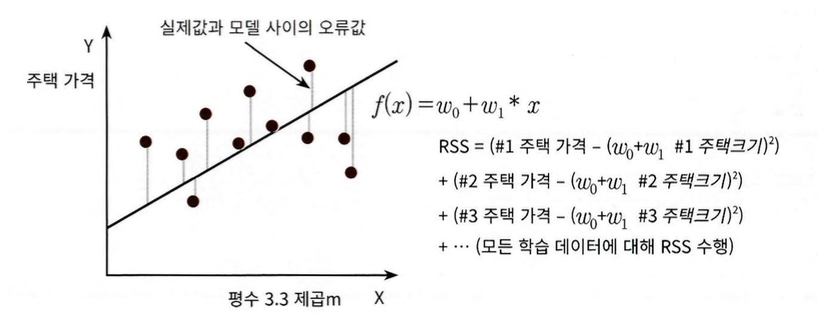

RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요

회귀에서 이 RSS는 비용(cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 함.
머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수를 반환하는 값을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것.
비용 함수를 손실 함수(loss function)이라고 함.

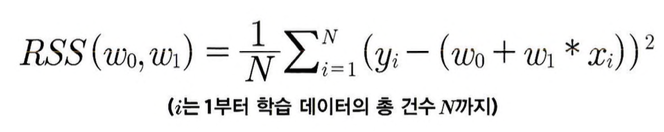

## 03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

- '데이터 기반으로 알고리즘이 스스로 학습한다'는 머신러닝 개념을 가능하게 만들어준 핵심 기법의 하나
- '점진적으로' 반복적인 계산 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터 구하는 방식
- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방정식을 가지고 W 파라미터를 지속해서 보정해 나감.
- 핵심은 "어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?

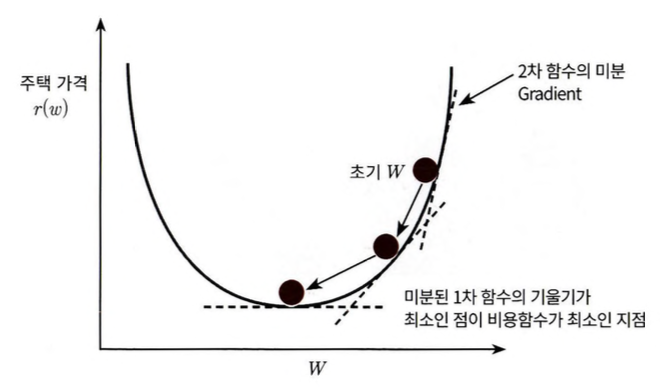

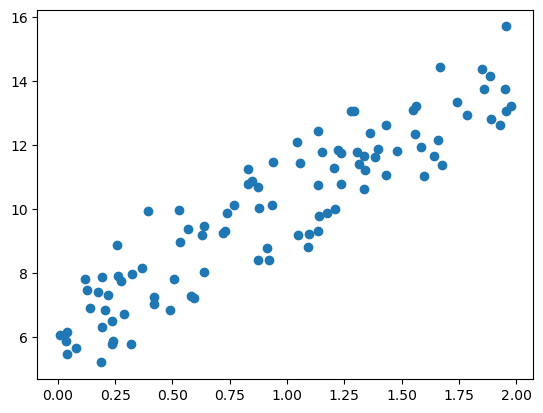

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x+6을 근사(w1=4, w0=6). 임의의 값은 노이즈 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [11]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [37]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [39]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만틈 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [41]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


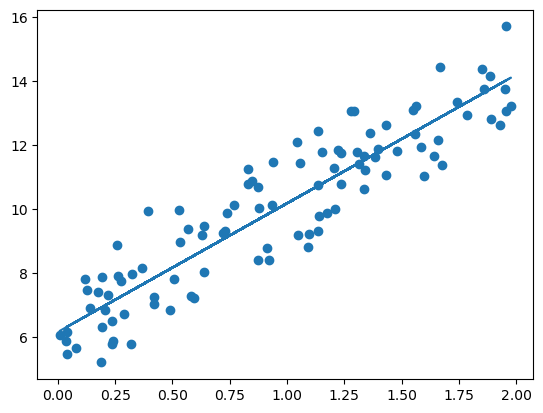

In [43]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [53]:
# (미니 배치) 확률적 경사하강법 stochastic_gradient_descent_steps() 함수로 구현 <- 수행 시간 오래걸림 피하기 위해
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [55]:
# stochastic_gradient_descent_steps()를 이용해 w1, w0 및 예측 오류 비용 계산
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### Linear Regression 클래스 - Ordinary Least Square
- 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장

In [69]:
# class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

### 입력 파라미터
- fit_intercept : 불린 값으로, 디폴트는 True, intercept 값 계산할 것인지 말지를 지정. 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정
- normalize : 불린 값으로 디폴트는 False, fit_intercept가 False인 경우 이 파라미터가 무시됨. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화

### 속성
- coef_ : fit() 메서드 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수. 피처 개수).
- intercept_ : intercept 값

## 회귀 평가 지표

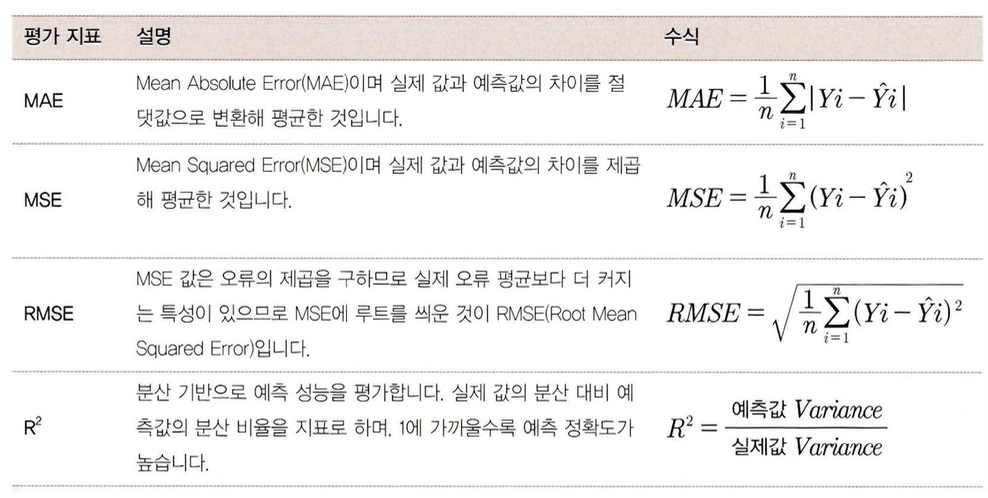

이 밖에 MSE나 RMSE에 로그를 취한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error)도 사용

RMSE를 구하기 위해 MSE를 위한 metrics.mean_squared_error() 함수를 그대로 사용하되, squared 파라미터를 False로 지정해 사용
mean_squared_error() 함수는 sqaured 파라미터가 기본적으로 True임.n

사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값임

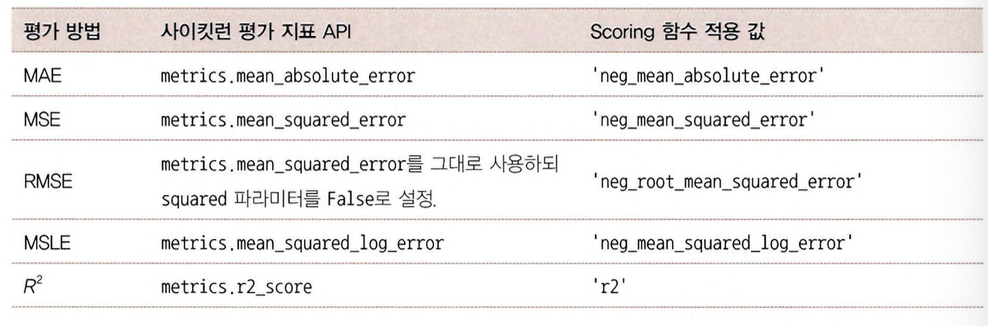

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data=np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target=raw_df.values[1::2, 2]

bostonDF=pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

bostonDF['PRICE']=target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


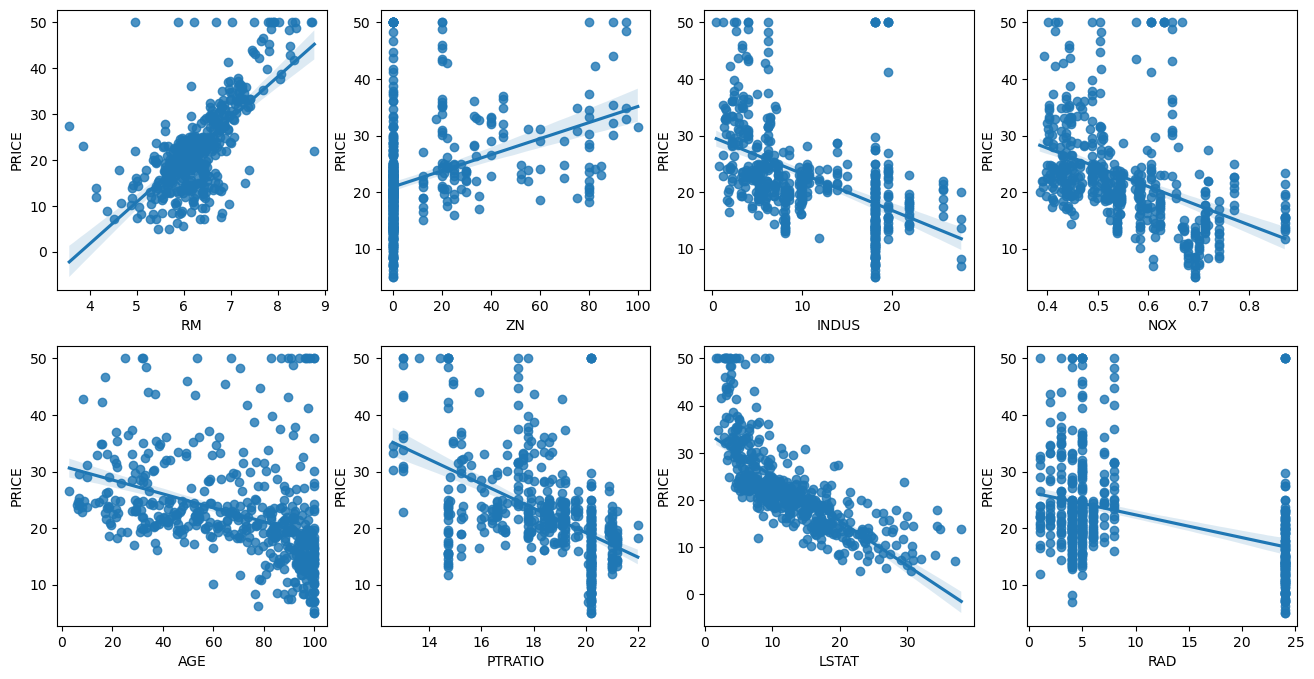

In [104]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [115]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.9955951721644
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [117]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [127]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squarred_error')로 반환된 값은 모두 음수
print('5 folds 의 개별 Negatice MSE Scores:', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negatice MSE Scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE: 5.829


## 05 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해
- 다항 회귀는 선형 회귀임 (비선형 회귀 아님!!)
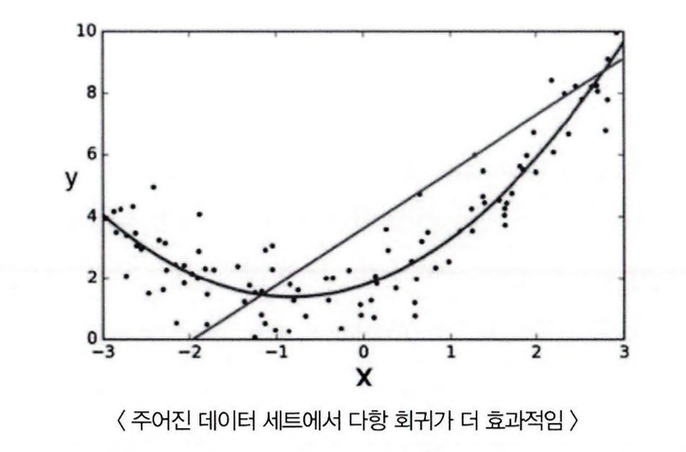

In [130]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures 를 이용해 변환 
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [136]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [140]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [142]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as  p

def polynomial_func(X):
    y =  1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

In [147]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터임
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값임
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872317896 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899500e+05 -1.87416382e+06  2.03716564e+07
 -1.44873571e+08  7.09316967e+08 -2.47066414e+09  6.24562771e+09
 -1.15676855e+10  1.56895436e+10 -1.54006546e+10  1.06457645e+10
 -4.91379382e+09  1.35920182e+09 -1.70381489e+08] 입니다.
Degree 15 MSE는 182663732.5628118 입니다.


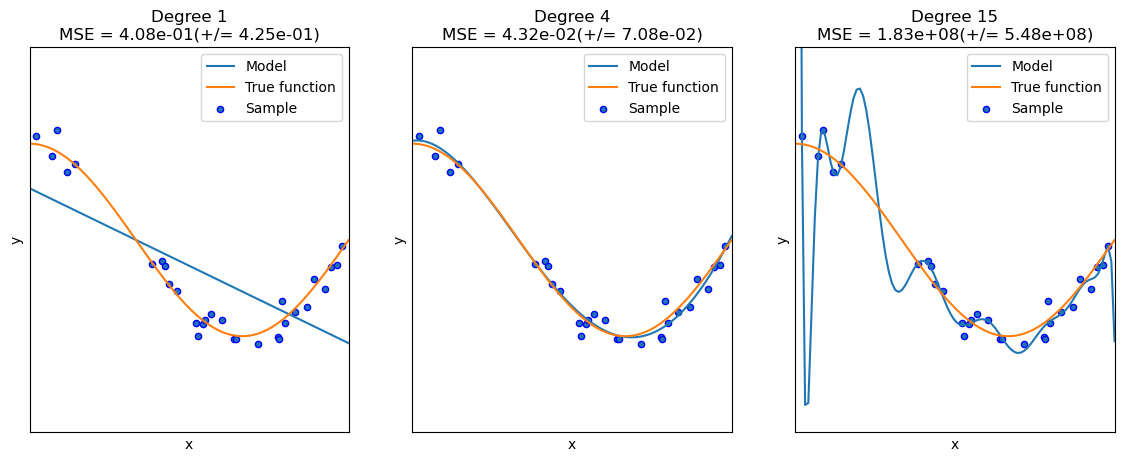

In [177]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교함
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환함
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행함.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교함.
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '-', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Sample")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/= {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 맨 왼쪽의 Degree 1 예측 곡선은 단순한 직선으로 단순 선형 회귀와 똑같음.
- 가운데 Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습
- 맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 1822663732.5628118이 될 정도로 어처구니 없는 오류 값이 발생

## 편향-분산 트레이드오프(Bias-Variance Trade off)

머신러닝이 극복해야 할 가장 중요한 이슈 중 하나
- Degree 1 과 같은 모델은 고편향(High Bias)성을 가졌다고 표현
- 반대로 Degree 15 와 같ㅇ느 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 됨 -> 이런 모델을 고분산(High Variance)성을 가졌다고 표현

- 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음. 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아짐(과적합).
- 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값을 최대로 낮아지는 모델을 구축하는 것이 가장 효율적은 머신러닝 예측 모델을 만드는 방법!